In [1]:
import sys
sys.path.append("../src")
from generator import train_generator, train_generator_resized
from skimage.io import imread, imshow
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

In [2]:
gen = train_generator(1)
gen1 = train_generator_resized(1)

In [3]:
gen = next(gen)

In [4]:
gen[1]

array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ..., 
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ..., 
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ..., 
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        ..., 
        [[ 0.99609375],
         [ 0.99609375],
         [ 0.99609375],
         ..., 
         [ 0.99609375],
         [ 0.99609375],
         [ 0.99609375]],

        [[ 0.99609375],
         [ 0.99609375],
         [ 0.99609375],
         ..., 
         [ 0.99609375],
         [ 0.99609375],
         [ 0.99609375]],

        [[ 0.99609375],
         [ 0.99609375],
         [ 0.99609375],
         ..., 
         [ 0.99609375],
         [ 0.99609375],
         [ 0.99609375]]],


       [[[ 0.99609

In [5]:
img = gen[0][0][:,:,:3] * 256
pred_mask = gen[0][0][:,:,3:].squeeze() * 256
mask = gen[1][0]

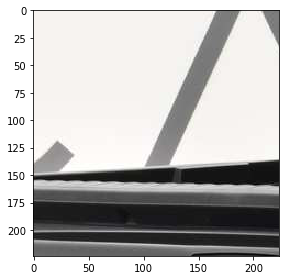

In [6]:
imshow(img.astype('uint8'))

/home/westside/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


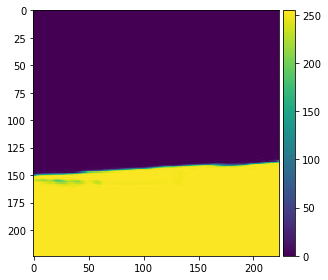

In [7]:
imshow(pred_mask)

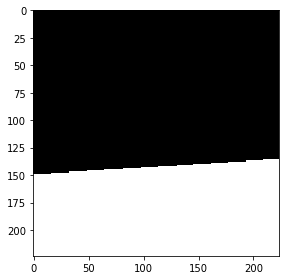

In [8]:
imshow(mask.squeeze())

In [9]:
from augmentation import tta, back_tta

In [10]:
augmentated = tta(gen[0][0])

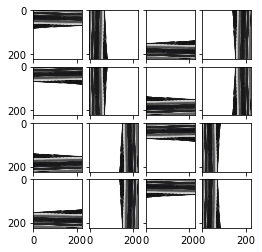

In [11]:
fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(len(augmentated)):
    grid[i].imshow(augmentated[i])

In [12]:
backed = back_tta(augmentated)

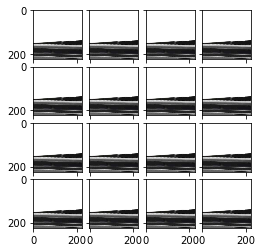

In [13]:
fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(len(augmentated)):
    grid[i].imshow(backed[i])

In [14]:
from cv2 import flip

In [22]:
augmentated = tta(gen[1][0].squeeze())

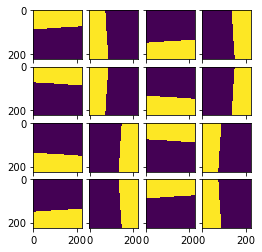

In [23]:
fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(len(augmentated)):
    grid[i].imshow(augmentated[i])

In [24]:
backed = back_tta(augmentated)

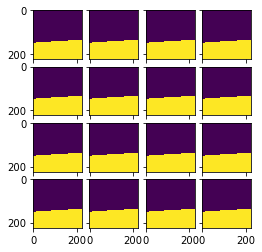

In [25]:
fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(len(augmentated)):
    grid[i].imshow(backed[i])

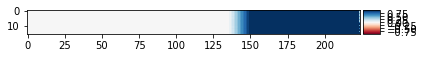

In [26]:
imshow(backed.mean(axis=2))

In [27]:
backed.shape

(16, 224, 224)

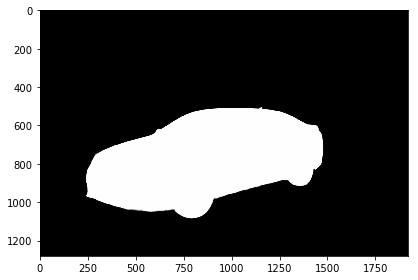

In [30]:
imshow(imread("../data/test_pred/313593189759_03.jpg"))

In [31]:
imread("../data/test_pred/313593189759_03.jpg")[800, 500]

254